https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb


# Tutorial 3: End to End Machine Learning  

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import pandas as pd

# Download the Data

In [6]:
url= "brain_stroke_in_numeric_without_useless_data.csv"
brain = pd.read_csv(url)
brain = brain.drop(brain.columns[0], axis=1)

## A Quick Look at the Data Structure

In [7]:
brain.head(100) 

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,228.69,36.6,2,1
1,0,80.0,0,1,1,105.92,32.5,1,1
2,1,49.0,0,0,1,171.23,34.4,3,1
3,1,79.0,1,0,1,174.12,24.0,1,1
4,0,81.0,0,0,1,186.21,29.0,2,1
...,...,...,...,...,...,...,...,...,...
95,0,71.0,1,1,0,216.94,30.9,1,1
96,0,61.0,1,0,1,76.11,27.3,3,1
97,0,74.0,0,0,1,72.96,31.3,3,1
98,1,38.0,0,0,0,82.28,24.0,2,1


Each row represents one district.

In [8]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
brain.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   avg_glucose_level  4981 non-null   float64
 6   bmi                4981 non-null   float64
 7   smoking_status     4981 non-null   int64  
 8   stroke             4981 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 350.4 KB


In [9]:
#This method shows a statistical summary of the numerical attributes 
brain.describe()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.583618,43.419859,0.096165,0.055210,0.658502,105.943562,28.498173,1.184501,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,45.075373,6.790464,1.031769,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,91.850000,28.100000,1.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,271.740000,48.900000,3.000000,1.000000


The count, mean, min, and max rows are self-explanatory.

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

# Create a Test Set 
The test data will be used in later P3 to test the classifier

Pick some instances randomly (typically 20% of the dataset)

In [10]:
# to make this notebook's output identical at every run
np.random.seed(42)

## How slicing works in Python

In [11]:
firstList = [1,2,3,4]
a= firstList[1:3]
b= firstList[:3] #Exclusive on the left
c= firstList[2:] #Inclusive on the left
print(a)
print(b)
print(c)

[2, 3]
[1, 2, 3]
[3, 4]


In [12]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(brain, 0.2)
len(train_set)

3985

In [14]:
len(test_set)

996

if you run the program again, it will generate a different test set! 

One solution is to save the test set on the first run and then load it in subsequent runs. 
Another option is to set the random number generator’s seed (e.g., with np.random.seed(42))14 before calling np.random.permutation() so that it always generates the same shuffled indices.

**But both these solutions will break the next time you fetch an updated dataset.**

##  Scikit-Learn Train Test Split

`train_test_split` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">Documentation Link</a>


In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(brain, test_size=0.2, random_state=42)

In [16]:
test_set.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,stroke
1129,1,65.00,1,0,1,180.76,26.9,0,0
3671,1,11.00,0,0,0,93.51,20.8,0,0
1041,0,1.56,0,0,0,93.74,20.1,0,0
2072,1,49.00,0,0,1,68.44,23.0,3,0
1375,1,49.00,1,0,1,107.91,25.0,0,0


<AxesSubplot:>

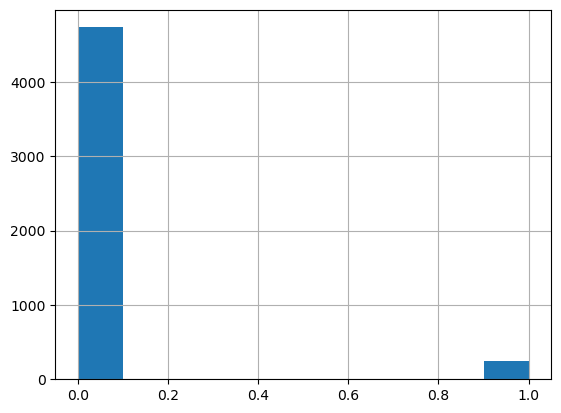

In [17]:
brain["stroke"].hist()

In [18]:
brain["stroke_cat"] = pd.cut(brain["stroke"],
                               bins=[0, 0.2, 0.6, 0.8, 1., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [19]:
brain["stroke_cat"].value_counts()

4    248
1      0
2      0
3      0
5      0
Name: stroke_cat, dtype: int64

<AxesSubplot:>

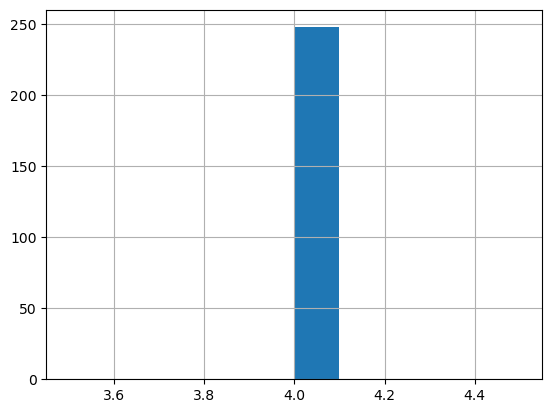

In [20]:
brain["stroke_cat"].hist()

stratified sampling based on the income category, to generate the test set with  income category proportions almost identical to those in the full dataset

`StratifiedShuffleSplit` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html">Documentation Link</a>

In [21]:
#Provides train/test indices to split data in train/test sets.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [22]:
for train_index, test_index in split.split(brain, brain["stroke"]):
    strat_train_set = brain.loc[train_index]
    strat_test_set = brain.loc[test_index]
    

In [23]:
strat_test_set["stroke"].value_counts() / len(strat_test_set)

0    0.94985
1    0.05015
Name: stroke, dtype: float64

In [24]:
brain["stroke"].value_counts() / len(brain)

0    0.950211
1    0.049789
Name: stroke, dtype: float64

In [25]:
def stroke_proportions(data):
    return data["stroke"].value_counts() / len(data)

train_set, test_set = train_test_split(brain, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": stroke_proportions(brain),
    "Stratified": stroke_proportions(strat_test_set),
    "Random": stroke_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [26]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
0,0.950211,0.94985,0.945838,-0.460244,-0.038018
1,0.049789,0.05015,0.054162,8.783609,0.725564


In [27]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("stroke_cat", axis=1, inplace=True)

# Prepare the Data for Machine Learning Algorithms

In [28]:
brain = strat_train_set.drop("stroke", axis=1)
brain_labels = strat_train_set["stroke"].copy()

## Custom Transformer

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
age_ix, avg_glucose_level_ix, bmi_ix = 1, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_avg_glucose_level_per_age = True): # no *args or **kargs
        self.add_avg_glucose_level_per_age = add_avg_glucose_level_per_age
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        bmi_per_age =  X[:, bmi_ix] /X[:, age_ix]
        bmi_per_avg_glucose_level =X[:, bmi_ix] / X[:, avg_glucose_level_ix]
        if self.add_avg_glucose_level_per_age:
            avg_glucose_level_per_age = X[:, avg_glucose_level_ix] / X[:, age_ix]
            return np.c_[X, bmi_per_age, bmi_per_avg_glucose_level ,
                         avg_glucose_level_per_age]
        else:
            return np.c_[X,bmi_per_age,bmi_per_avg_glucose_level]

attr_adder = CombinedAttributesAdder(add_avg_glucose_level_per_age=False)
brain_extra_attribs = attr_adder.transform(brain.values)

In [30]:
brain_extra_attribs = pd.DataFrame(
    brain_extra_attribs,
    columns=list(brain.columns)+["age_per_bmi", "avg_glucose_level_per_bmi"],
    index=brain.index)
brain_extra_attribs.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status,age_per_bmi,avg_glucose_level_per_bmi
4428,1.0,24.0,0.0,0.0,0.0,187.99,24.9,3.0,1.037500,0.132454
1135,0.0,3.0,0.0,0.0,0.0,86.38,22.8,0.0,7.600000,0.263950
2417,1.0,69.0,0.0,0.0,1.0,111.48,37.0,3.0,0.536232,0.331898
1173,1.0,46.0,0.0,0.0,1.0,127.75,30.5,1.0,0.663043,0.238748
3696,0.0,52.0,1.0,0.0,1.0,100.71,37.0,1.0,0.711538,0.367392


In [31]:
brain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3984 entries, 4428 to 2029
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3984 non-null   int64  
 1   age                3984 non-null   float64
 2   hypertension       3984 non-null   int64  
 3   heart_disease      3984 non-null   int64  
 4   ever_married       3984 non-null   int64  
 5   avg_glucose_level  3984 non-null   float64
 6   bmi                3984 non-null   float64
 7   smoking_status     3984 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 280.1 KB


## Transformation Pipelines

`Pipeline` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html">Documentation Link</a>

There are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations.

`StandardScaler` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">Documentation Link</a>

Standardization used in numerical data preparation, first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance.



In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # Dealing with missing values
        ('attribs_adder', CombinedAttributesAdder()), # New attribute
        ('std_scaler', StandardScaler()),            # Attribute normalization
    ])

brain_num_tr = num_pipeline.fit_transform(brain)

In [33]:
brain_num_tr

array([[ 0.84602735, -0.8668014 , -0.32894656, ..., -0.10586901,
        -1.46635264,  0.01649148],
       [-1.18199489, -1.79493002, -0.32894656, ...,  1.13849268,
        -0.33709707,  0.5894073 ],
       [ 0.84602735,  1.12204565, -0.32894656, ..., -0.20091797,
         0.24642413, -0.15344642],
       ...,
       [ 0.84602735,  0.41490003, -0.32894656, ..., -0.19991726,
         1.45192404, -0.16626702],
       [ 0.84602735,  0.01713062, -0.32894656, ..., -0.21080479,
        -0.48057091, -0.14409019],
       [-1.18199489,  0.06132722,  3.04000744, ..., -0.13531232,
         1.166305  , -0.14267977]])

So far, we have handled the categorical columns and the numerical columns separately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.


`ColumnTransformer` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html">Documentation Link</a>


In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(brain)
cat_attribs = ["bmi"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),#  Apply the numerical transformation to the all numeric columns
        ("cat", OneHotEncoder(handle_unknown='ignore'), cat_attribs), # Apply the One Hot Encoding to the all categorical columns
    ])

brain_prepared = full_pipeline.fit_transform(brain) #Now fit_transform applies all the transformation to the data 

In [35]:
brain_prepared

<3984x348 sparse matrix of type '<class 'numpy.float64'>'
	with 47808 stored elements in Compressed Sparse Row format>

In [36]:
brain_prepared.shape

(3984, 348)

# Select and Train a Model

You will use some regression models: 
- Linear Regression
- Decision Tree Regression
- Random Forest Regressor
- Support Vector Regression

## Linear Regression


`LinearRegression` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">Documentation Link</a>

- fit() <- Train the Model 
- predict() <- To predict the value

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(brain_prepared, brain_labels)

LinearRegression()

In [38]:
# let's try the full preprocessing pipeline on a few training instances
some_data = brain.iloc[:5]
some_labels = brain_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 0.00061495 -0.06818187  0.05534277  0.04241244  0.06122604]


In [39]:
print("Labels:", list(some_labels))

Labels: [0, 0, 0, 0, 0]


In [40]:
some_data_prepared

<5x348 sparse matrix of type '<class 'numpy.float64'>'
	with 60 stored elements in Compressed Sparse Row format>

### Mean Squared Error


`mean_squared_error` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html">Documentation Link</a>

In [41]:
from sklearn.metrics import mean_squared_error

brain_predictions = lin_reg.predict(brain_prepared)
lin_mse = mean_squared_error(brain_labels, brain_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.19999149653164328

### Mean Absolute Error
`mean_absolute_error` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html">Documentation Link</a>

In [42]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(brain_labels, brain_predictions)
lin_mae

0.09949333811622021

## Decision Tree Regressor


In [43]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(brain_prepared, brain_labels)

DecisionTreeRegressor(random_state=42)

In [44]:
brain_predictions = tree_reg.predict(brain_prepared)
tree_mse = mean_squared_error(brain_labels, brain_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Evaluation Using Cross-Validation
`cross_val_score` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">Documentation Link</a>

In [45]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, brain_prepared, brain_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [46]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.27420425 0.28758784 0.30451901 0.29617444 0.29227921 0.26993392
 0.30490134 0.27454851 0.32485018 0.30075282]
Mean: 0.29297515197920626
Standard deviation: 0.016169518285642084


In [47]:
lin_scores = cross_val_score(lin_reg, brain_prepared, brain_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [0.22991578 0.20961226 0.22971554 0.20512575 0.23341837 0.21552402
 0.21804296 0.22046642 0.23787548 0.19625421]
Mean: 0.21959507846669157
Standard deviation: 0.01267972119114614


## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(brain_prepared, brain_labels)

RandomForestRegressor(random_state=42)

In [49]:
brain_predictions = forest_reg.predict(brain_prepared)
forest_mse = mean_squared_error(brain_labels, brain_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.08549510307966421

In [50]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, brain_prepared, brain_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.21997664 0.22221995 0.23896393 0.20719937 0.25283667 0.22870676
 0.23183125 0.229394   0.24674413 0.22228202]
Mean: 0.23001547216470491
Standard deviation: 0.012759525372558705


In [51]:
scores = cross_val_score(lin_reg, brain_prepared, brain_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    10.000000
mean      0.219595
std       0.013366
min       0.196254
25%       0.211090
50%       0.219255
75%       0.229866
max       0.237875
dtype: float64

## Support Vector Regression

In [52]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(brain_prepared, brain_labels)
brain_predictions = svm_reg.predict(brain_prepared)
svm_mse = mean_squared_error(brain_labels, brain_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.22128699995783932

# Fine-Tune Your Model

## Grid Search
One option would be to try to tune the hyperparameters manually, until you find a great combination of hyperparameter values. Instead, you can use Scikit-Learn’s GridSearchCV to optimize hyperparameters for you. 


`GridSearchCV` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html">Documentation Link</a>

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(brain_prepared, brain_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [55]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30, random_state=42)

In [56]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.24464580947648548 {'max_features': 2, 'n_estimators': 3}
0.2253958489293653 {'max_features': 2, 'n_estimators': 10}
0.21848343247652596 {'max_features': 2, 'n_estimators': 30}
0.24108459378203068 {'max_features': 4, 'n_estimators': 3}
0.22133953259926384 {'max_features': 4, 'n_estimators': 10}
0.2153524996921744 {'max_features': 4, 'n_estimators': 30}
0.2506159627354553 {'max_features': 6, 'n_estimators': 3}
0.2251630403374884 {'max_features': 6, 'n_estimators': 10}
0.21794017455131676 {'max_features': 6, 'n_estimators': 30}
0.24469835040548168 {'max_features': 8, 'n_estimators': 3}
0.22567287246668308 {'max_features': 8, 'n_estimators': 10}
0.21886679952356977 {'max_features': 8, 'n_estimators': 30}
0.24804198745241052 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.2289102879423566 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.24843292459984045 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.2301068499066853 {'bootstrap': False, 'max_featur

In [57]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.026579,0.001759,0.004076,0.001060,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.056601,-0.059389,...,-0.059852,0.004902,14,-0.014922,-0.014294,-0.014399,-0.013806,-0.014150,-0.014314,0.000364
1,0.085796,0.004848,0.008629,0.001876,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.047227,-0.049297,...,-0.050803,0.002727,7,-0.009727,-0.008805,-0.008221,-0.008431,-0.008485,-0.008734,0.000531
2,0.219020,0.017189,0.014756,0.001635,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.046537,-0.045709,...,-0.047735,0.002535,3,-0.007288,-0.007230,-0.007032,-0.006897,-0.006952,-0.007080,0.000154
3,0.025464,0.002603,0.002900,0.001138,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.057159,-0.056462,...,-0.058122,0.003757,12,-0.016316,-0.016107,-0.013179,-0.013179,-0.014325,-0.014621,0.001366
4,0.082071,0.001185,0.006979,0.001611,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.047240,-0.046161,...,-0.048991,0.003348,5,-0.009366,-0.009307,-0.008089,-0.008513,-0.008287,-0.008712,0.000527
5,0.192158,0.027536,0.010900,0.001085,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.044969,-0.043448,...,-0.046377,0.002950,1,-0.007458,-0.007393,-0.006891,-0.007019,-0.006881,-0.007128,0.000248
6,0.020440,0.000986,0.001956,0.000126,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.062875,-0.059111,...,-0.062808,0.003379,18,-0.016560,-0.015480,-0.013144,-0.013701,-0.014220,-0.014621,0.001240
7,0.063724,0.001361,0.004536,0.000524,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.048959,-0.048971,...,-0.050698,0.001730,6,-0.009853,-0.008987,-0.008033,-0.008230,-0.008595,-0.008739,0.000645
8,0.185460,0.002551,0.009410,0.000255,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.045426,-0.045221,...,-0.047498,0.002340,2,-0.007337,-0.007353,-0.007092,-0.007025,-0.006946,-0.007151,0.000165
9,0.020322,0.000791,0.002013,0.000362,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.062875,-0.055486,...,-0.059877,0.004352,15,-0.015968,-0.014678,-0.012063,-0.014190,-0.013976,-0.014175,0.001262


## Randomized Search

The grid search approach is fine when you are exploring relatively few combinations, like in the previous example, but when the hyperparameter search space is large, it is often preferable to use RandomizedSearchCV instead.

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(brain_prepared, brain_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb864f72ac0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb864f73be0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [59]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.21487227922856264 {'max_features': 7, 'n_estimators': 180}
0.21829302208687593 {'max_features': 5, 'n_estimators': 15}
0.21639401502864064 {'max_features': 3, 'n_estimators': 72}
0.21676503224988808 {'max_features': 5, 'n_estimators': 21}
0.21513056917391585 {'max_features': 7, 'n_estimators': 122}
0.21631266401479135 {'max_features': 3, 'n_estimators': 75}
0.21621620488033597 {'max_features': 3, 'n_estimators': 88}
0.2145017343853819 {'max_features': 5, 'n_estimators': 100}
0.2152298440293145 {'max_features': 3, 'n_estimators': 150}
0.250128117332992 {'max_features': 5, 'n_estimators': 2}


In [60]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.85251392e-02, 1.14258704e-01, 2.47104736e-02, 1.48064125e-02,
       1.37571387e-02, 1.09630547e-01, 5.69614140e-02, 4.30863931e-02,
       1.10478736e-01, 9.68777786e-02, 1.02051192e-01, 8.50853700e-08,
       1.87024603e-06, 2.93927958e-05, 6.14470412e-06, 9.62061249e-08,
       9.90827556e-07, 7.58006807e-09, 1.59204092e-06, 0.00000000e+00,
       1.33210474e-04, 5.24573440e-06, 2.27519144e-08, 1.02147937e-06,
       0.00000000e+00, 2.67591757e-06, 6.82925393e-07, 2.28139277e-06,
       3.62208571e-07, 1.15246616e-05, 1.72143925e-05, 1.32584659e-05,
       2.78489167e-06, 1.01522341e-05, 2.06646840e-05, 9.29972016e-08,
       9.07989998e-07, 4.57658655e-05, 5.91836469e-06, 2.04327214e-03,
       1.90117749e-05, 8.64974946e-06, 2.51136201e-05, 3.92494077e-05,
       7.94863780e-06, 1.34135637e-06, 1.91837991e-04, 1.34135970e-06,
       8.89608618e-06, 2.41118354e-06, 1.89779401e-05, 1.02243314e-05,
       5.39338923e-05, 3.09931493e-04, 7.55651346e-06, 7.37626584e-05,
      

In [61]:
extra_attribs = ["age_per_bmi", "avg_glucose_level_per_bmi", "average_glucose_level_per_age"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.11425870429718286, 'age'),
 (0.11047873606609326, 'age_per_bmi'),
 (0.10963054678344862, 'avg_glucose_level'),
 (0.10205119212108707, 'average_glucose_level_per_age'),
 (0.09687777855563248, 'avg_glucose_level_per_bmi'),
 (0.05696141403846292, 'bmi'),
 (0.04308639308021011, 'smoking_status'),
 (0.024710473574060678, 'hypertension'),
 (0.018525139222820706, 'gender'),
 (0.014806412503728602, 'heart_disease'),
 (0.0137571386521359, 'ever_married'),
 (0.0073405111426885035, 31.7),
 (0.006783176570773226, 31.4),
 (0.005951978338378477, 30.9),
 (0.00578658062329228, 28.0),
 (0.004404530168739747, 40.4),
 (0.004287910340333668, 32.3),
 (0.00390811052038184, 28.1),
 (0.003897688017485641, 29.9),
 (0.00385105704594045, 44.1),
 (0.003729808817907875, 27.3),
 (0.0035433809232978675, 34.4),
 (0.003539066742696261, 30.2),
 (0.0035262182714006804, 42.5),
 (0.003497481638709043, 36.5),
 (0.0033689876055492, 33.6),
 (0.0033396905658106546, 30.0),
 (0.003273488948685699, 30.3),
 (0.003259575031910

In [62]:
brain.head()

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,smoking_status
4428,1,24.0,0,0,0,187.99,24.9,3
1135,0,3.0,0,0,0,86.38,22.8,0
2417,1,69.0,0,0,1,111.48,37.0,3
1173,1,46.0,0,0,1,127.75,30.5,1
3696,0,52.0,1,0,1,100.71,37.0,1


# Evaluate the model with Test Set

In [63]:
from sklearn.model_selection import GridSearchCV
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("stroke", axis=1)
y_test = strat_test_set["stroke"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
range(len(brain))


range(0, 3984)

In [64]:
final_rmse

0.21323896692558544

You might want to try other models and record their performance on the test data using optimized hyperparameters.